In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,classification_report
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

In [3]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Drop kolom Id karna gak guna
data = data.drop(columns=['id'])

In [5]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [6]:
data[data['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [7]:
data.drop([3116], inplace=True)
data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [8]:
data = data.reset_index(drop=True) 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.2+ KB


In [10]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [11]:
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.333314,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.167770,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.041322,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.175672,0.131991
bmi,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.245239,0.127891,0.134905,0.131991,0.042341,1.000000


<AxesSubplot: >

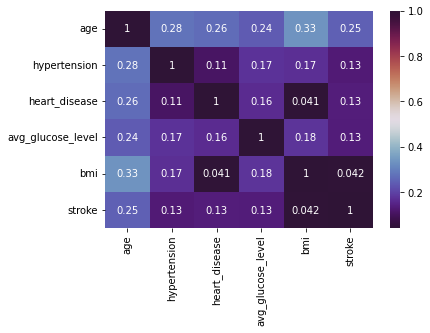

In [12]:
sns.heatmap(data.corr(),annot=True,cmap='twilight_shifted')

In [13]:
data_null=pd.DataFrame(data.isnull().sum(),columns=['Number of null'])
data_null['percentage']=(data.isnull().sum())/len(data)*100
data_null

,Number of null,percentage
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,201,3.934234
smoking_status,0,0.000000


In [14]:
data.duplicated().sum()

0

In [35]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [36]:
data['hypertension'].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [37]:
data['heart_disease'].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

In [38]:
data['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [39]:
data['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [40]:
data['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [41]:
data['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

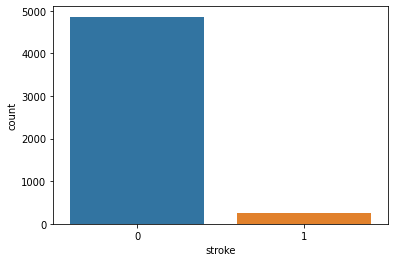

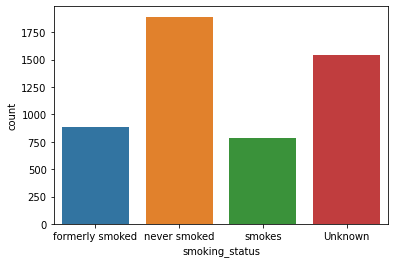

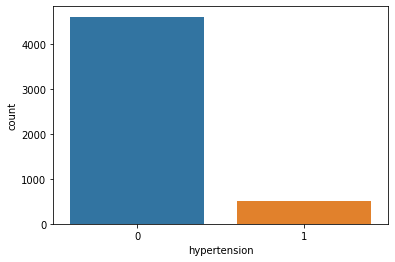

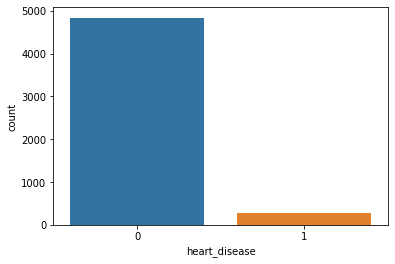

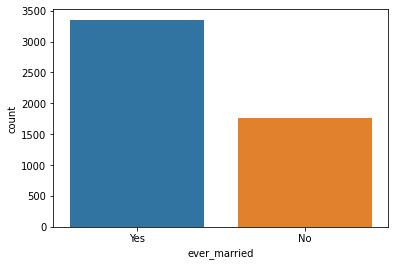

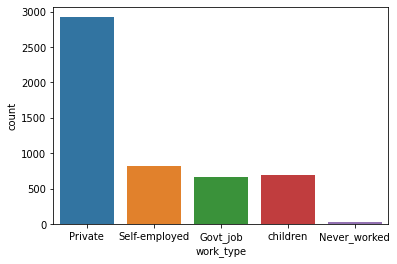

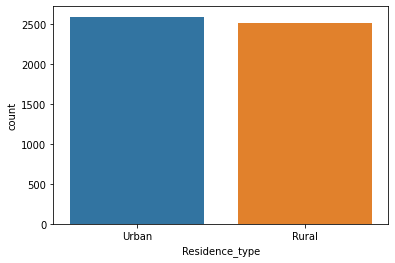

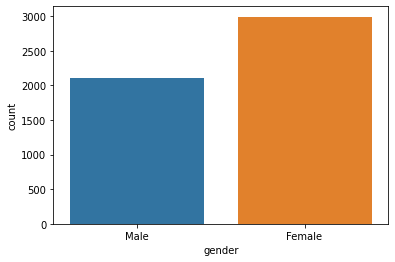

<Figure size 432x288 with 0 Axes>

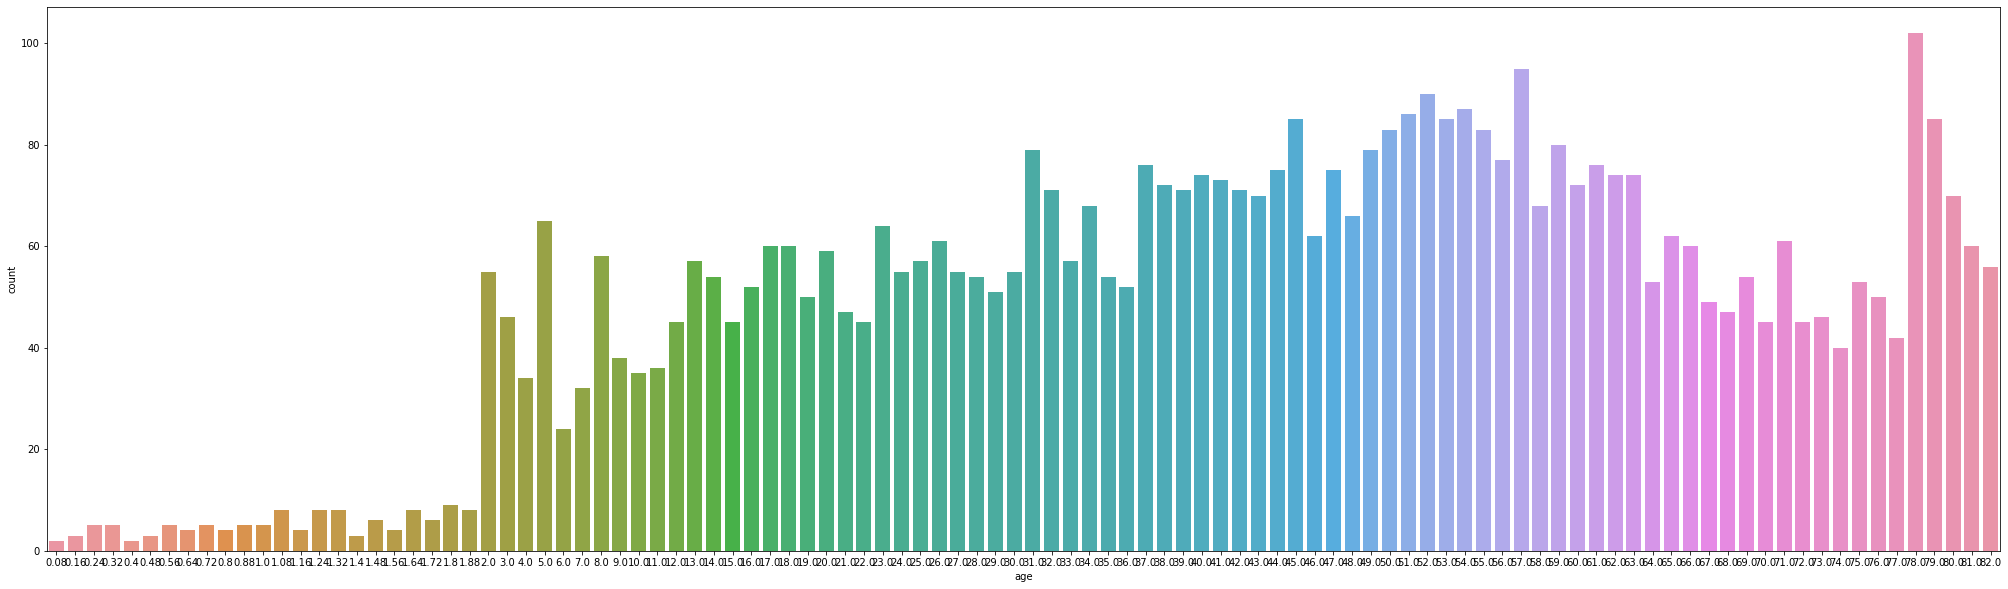

In [16]:
list1=['stroke','smoking_status','hypertension','heart_disease','ever_married','work_type','Residence_type','gender','age']
for col in list1:
    plt.figure()
    if col=='age':
        plt.figure(figsize=(35,10))
    sns.countplot(x=col,data=data)

In [17]:
#Membagi data label dan feature

X=data.iloc[:,0:-1]
y=data.iloc[:,-1]
key=X.keys()

In [18]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5107,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [19]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5104    0
5105    0
5106    0
5107    0
5108    0
Name: stroke, Length: 5109, dtype: int64

In [20]:
list1=['gender','ever_married','work_type','Residence_type','smoking_status']
label=LabelEncoder()
for col in list1:
    X[col]=label.fit_transform(X[col])
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
...,...,...,...,...,...,...,...,...,...,...
5104,0,80.0,1,0,1,2,1,83.75,NaN,2
5105,0,81.0,0,0,1,3,1,125.20,40.0,2
5106,0,35.0,0,0,1,3,0,82.99,30.6,2
5107,1,51.0,0,0,1,2,0,166.29,25.6,1


In [21]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
X = impute.fit_transform(X)
pd.DataFrame(X,columns=key)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,36.60000,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,28.89456,2.0
2,1.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,32.50000,2.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.40000,3.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.00000,2.0
...,...,...,...,...,...,...,...,...,...,...
5104,0.0,80.0,1.0,0.0,1.0,2.0,1.0,83.75,28.89456,2.0
5105,0.0,81.0,0.0,0.0,1.0,3.0,1.0,125.20,40.00000,2.0
5106,0.0,35.0,0.0,0.0,1.0,3.0,0.0,82.99,30.60000,2.0
5107,1.0,51.0,0.0,0.0,1.0,2.0,0.0,166.29,25.60000,1.0


In [22]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
pd.DataFrame(X,columns=key)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333
1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.212996,0.666667
2,1.0,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667
3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000
4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667
...,...,...,...,...,...,...,...,...,...,...
5104,0.0,0.975586,1.0,0.0,1.0,0.50,1.0,0.132167,0.212996,0.666667
5105,0.0,0.987793,0.0,0.0,1.0,0.75,1.0,0.323516,0.340206,0.666667
5106,0.0,0.426270,0.0,0.0,1.0,0.75,0.0,0.128658,0.232532,0.666667
5107,1.0,0.621582,0.0,0.0,1.0,0.50,0.0,0.513203,0.175258,0.333333


# Applying RandomForestClassifier Model

test score = 0.9493057929934081
train score 0.9493052195064


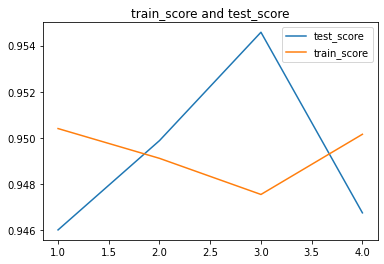

In [23]:
kfold = KFold(n_splits=4, random_state=44, shuffle =True)
test_score=[]
train_score=[]
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=25,random_state=33)
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    RandomForestClassifierModel.fit(X[:1350], y[:1350])
    test_score.append(RandomForestClassifierModel.score(X_test, y_test))
    train_score.append(RandomForestClassifierModel.score(X_train, y_train))
plt.plot(range(1,5),test_score,label="test_score")
plt.plot(range(1,5),train_score,label="train_score")
plt.title("train_score and test_score")
plt.legend()
print("test score =",np.mean(test_score))
print("train score",np.mean(train_score))

# Applying DecisionTreeClassifier Model

test score = 0.8843205846056938
train score 0.8843216516289211


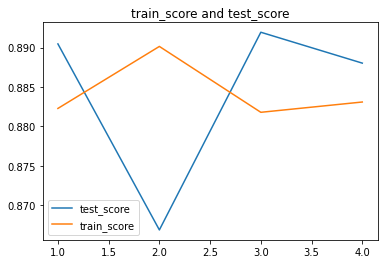

In [24]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=33)
test_score=[]
train_score=[]
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    DecisionTreeClassifierModel.fit(X[:1350], y[:1350])
    test_score.append(DecisionTreeClassifierModel.score(X_test, y_test))
    train_score.append(DecisionTreeClassifierModel.score(X_train, y_train))
plt.plot(range(1,5),test_score,label="test_score")
plt.plot(range(1,5),train_score,label="train_score")
plt.title("train_score and test_score")
plt.legend()
print("test score =",np.mean(test_score))
print("train score",np.mean(train_score))

In [25]:
y_pred = RandomForestClassifierModel.predict(X)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])

Predicted Value for RandomForestClassifierModel is :  [1 1 1 1 1 1 1 1 1 1]


In [26]:
data['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [27]:
CM = confusion_matrix(y, y_pred)
CM

array([[4601,  259],
       [   0,  249]], dtype=int64)

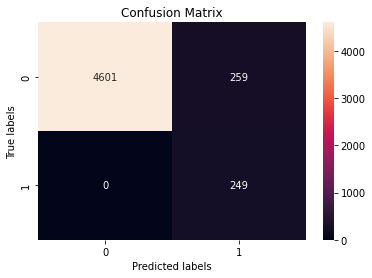

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [29]:
print('Accuracy: {}'.format(accuracy_score(y, y_pred)))

Accuracy: 0.9493051477784302


In [30]:
print('Precision: {}'.format(precision_score(y, y_pred)))

Precision: 0.49015748031496065


In [31]:
print('Recall: {}'.format(recall_score(y, y_pred)))

Recall: 1.0


In [32]:
print('F1-Score: {}'.format(f1_score(y, y_pred)))

F1-Score: 0.6578599735799208


In [33]:
ClassificationReport = classification_report(y,y_pred)
print(ClassificationReport )

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4860
           1       0.49      1.00      0.66       249

    accuracy                           0.95      5109
   macro avg       0.75      0.97      0.82      5109
weighted avg       0.98      0.95      0.96      5109



In [ ]:
Memprediksi bahwa yang tidak stroke adalah 4601 dan benar

Memprediksi bahwa yang tidak stroke adalah 259 dan salah

Memprediksi bahwa yang stroke itu 0

Memprediksi bahwa yang stroke itu ada 249